# Layout: using `layout` to arrange a set of plots

## Layout of multiple plots

**Relative to our `R` cousins:**

This functionality is very similar to layout design matrices of `gridExtra`'s `arrange.grid` and `patchwork`'s `plot_layout` functionality. It also has some similar structure to `cowplot`'s `plot_grid`.

In [1]:
import numpy as np
import cowpatch as cow

import plotnine as p9
import plotnine.data as p9_data

In [2]:
mtcars = p9_data.mpg

g0 = p9.ggplot(p9_data.mpg) +\
    p9.geom_bar(p9.aes(x="hwy")) +\
    p9.labs(title = 'Plot 0')

g1 = p9.ggplot(p9_data.mpg) +\
    p9.geom_point(p9.aes(x="hwy", y = "displ")) +\
    p9.labs(title = 'Plot 1')

g2 = p9.ggplot(p9_data.mpg) +\
    p9.geom_point(p9.aes(x="hwy", y = "displ", color="class")) +\
    p9.labs(title = 'Plot 2')

g3 = p9.ggplot(p9_data.mpg[p9_data.mpg["class"].isin(["compact",
                                                     "suv",
                                                     "pickup"])]) +\
    p9.geom_histogram(p9.aes(x="hwy"),bins=10) +\
    p9.facet_wrap("class")

### Design matrix approach

One way to define the layout of different plots on the same level is thorugh a `design` matrix. Without specification of the relative heights and widths of each row or column they are assumed to be equivalent. 

**Note** that the values in the `design` matrix must be from `0` to the number of objects in the arrangement.

In [3]:
patch_obj = cow.patch(g0,g1,g2)
layout_obj = cow.layout(design = np.array([[0,0,0,1,1,1],
                                           [0,0,0,2,2,2],
                                           [0,0,0,2,2,2]]))

Note, that the above `patch_obj` could also have been defined as 
```python
patch_obj = cow.patch(grobs = [g0,g1,g2])
```

This can be useful it you're building a list of plots.


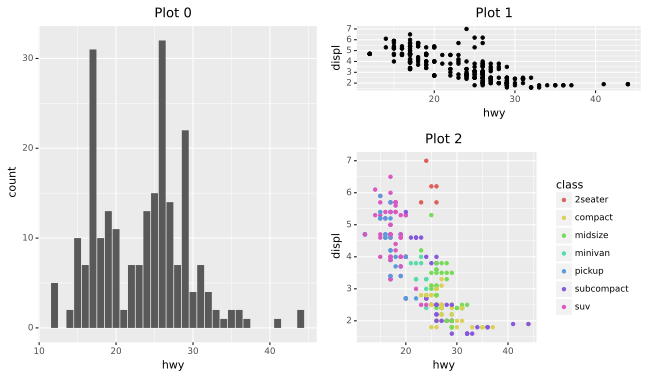

In [4]:
vis = patch_obj + layout_obj
vis.show(width = 12, height = 7)

A similar arrangement can be described with the `rel_heights` structure in combination of a less large `design` matrix.

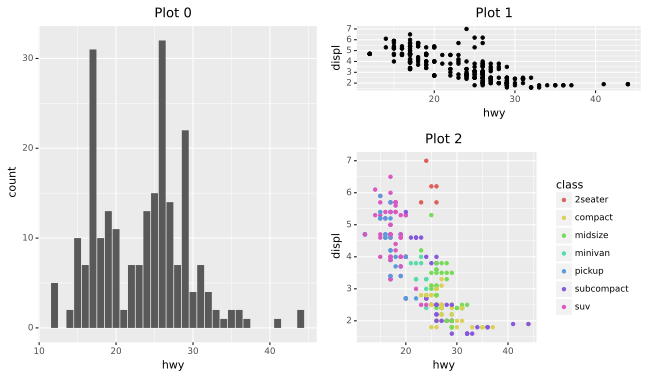

In [5]:
layout_obj_rh = cow.layout(design = np.array([[0,1],
                                              [0,2]]),
                                 rel_heights = [1,2])
vis_rh = patch_obj + layout_obj_rh
vis_rh.show(width = 12, height = 7)

### Design string approach

Very similar to the `design` matrix approach, the `design` string approach can capture similar structures. 

**Note** that in the string format, one can use "\n" characters instead of a block string, and the values need to be capital letters (starting with "A").

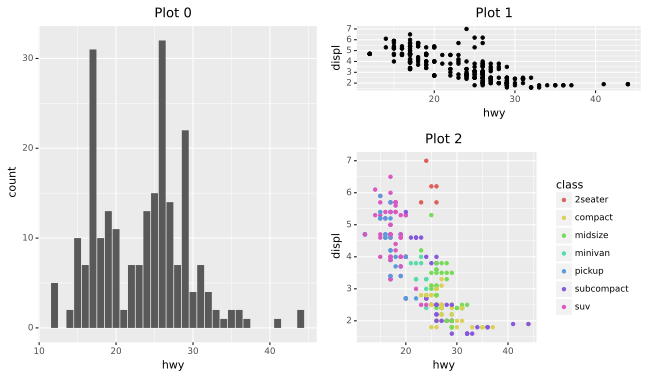

In [6]:
layout_obj_str = cow.layout(design = """
                                    AAABBB
                                    AAACCC
                                    AAACCC
                                    """)
vis_str = patch_obj + layout_obj_str
vis_str.show(width = 12, height = 7)

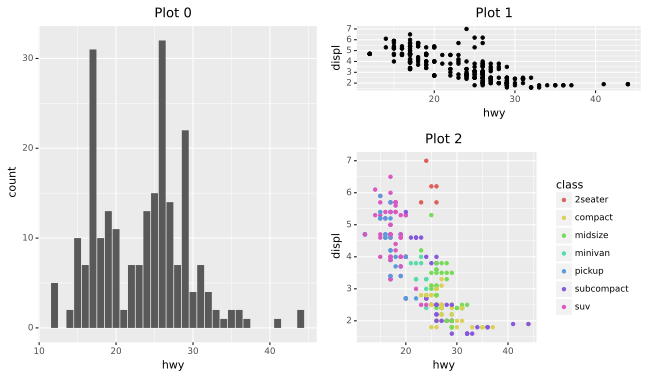

In [7]:
layout_obj_str_rh = cow.layout(design = """
                                        AB
                                        AC
                                        """,
                                 rel_heights = [1,2])
vis_str_rh = patch_obj + layout_obj_str_rh
vis_str_rh.show(width = 12, height = 7)

### Empty space

In this layout approach we can also define empty space, which can be seen in the following examples:

#### `design` string

we can define empty spaces with either "`#`" or "`.`"s. 

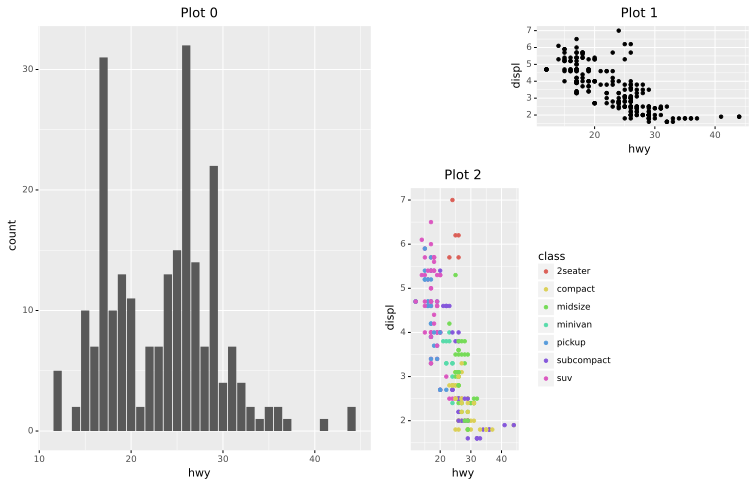

In [8]:
layout_obj_str_rh_hash = cow.layout(design = """
                                        A#BB
                                        ACC#
                                        """,
                                 rel_heights = [1,2],
                                 rel_widths = [3,1,1,1])
vis_str_rh_hash = patch_obj + layout_obj_str_rh_hash
vis_str_rh_hash.show(width = 14, height = 9)

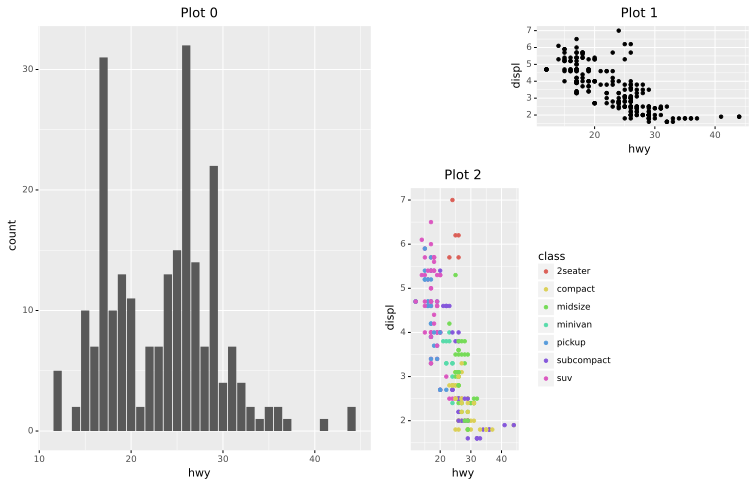

In [9]:
layout_obj_str_rh_dot = cow.layout(design = """
                                        A.BB
                                        ACC.
                                        """,
                                 rel_heights = [1,2],
                                 rel_widths = [3,1,1,1])
vis_str_rh_dot = patch_obj + layout_obj_str_rh_dot
vis_str_rh_dot.show(width = 14, height = 9)

#### `design` matrix

We can describe empty spaces in the design matrix with `np.nan`.

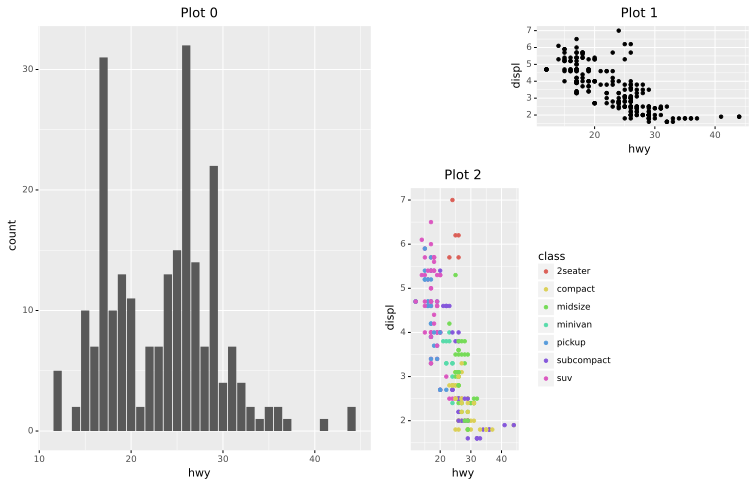

In [10]:
layout_obj_str_rh_nan = cow.layout(design = np.array([[0,np.nan,1,1],
                                                      [0,2,2,np.nan]]),
                                 rel_heights = [1,2],
                                 rel_widths = [3,1,1,1])
vis_str_rh_nan = patch_obj + layout_obj_str_rh_nan
vis_str_rh_nan.show(width = 14, height = 9)

### `ncol` and `nrow` approaches

Instead of the `design` parameter we can also use `layout` with `ncol` and/or `nrow` specified (relative to the design layout. 

In [25]:
# just another plot
g3 = p9.ggplot(p9_data.mpg[p9_data.mpg["class"].isin(["compact",
                                                     "suv",
                                                     "pickup"])]) +\
    p9.geom_histogram(p9.aes(x="hwy"),bins=15) +\
    p9.facet_wrap("class")

#### `ncol` and `nrow`

/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotni

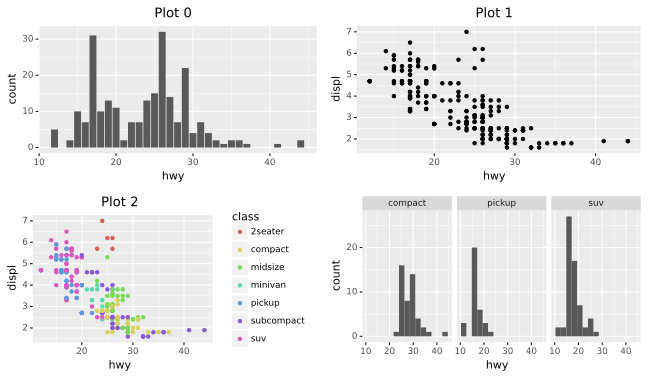

In [36]:
vis_ncol_nrow = cow.patch(g0,g1,g2,g3) + cow.layout(ncol = 2, nrow = 2)
vis_ncol_nrow.show(width = 12, height = 7)

/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotni

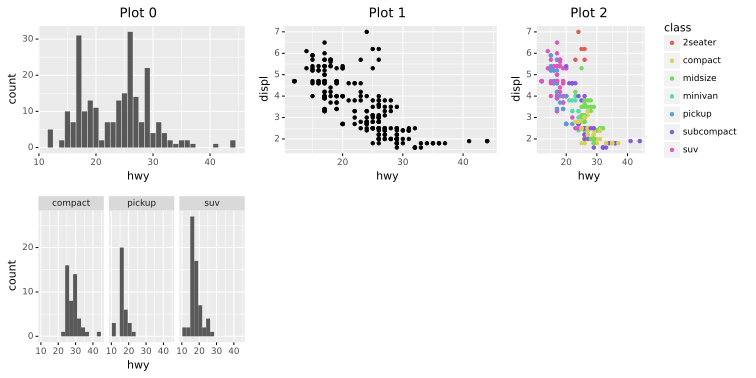

In [39]:
vis_ncol_nrow_over = cow.patch(g0,g1,g2,g3) + cow.layout(ncol = 3, nrow = 2)
vis_ncol_nrow_over.show(width = 14, height = 7)

/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotni

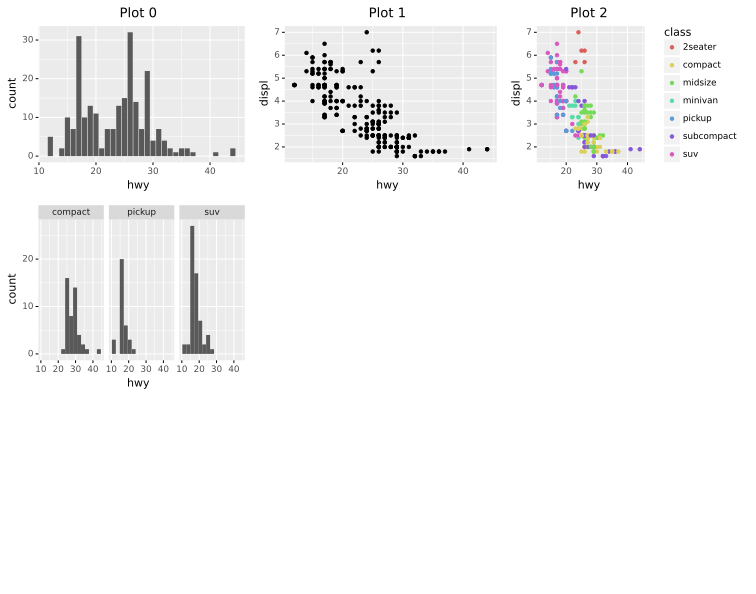

In [40]:
vis_ncol_nrow_X_over = cow.patch(g0,g1,g2,g3) + cow.layout(ncol = 3, nrow = 3)
vis_ncol_nrow_X_over.show(width = 14, height = 11)

#### only `ncol`

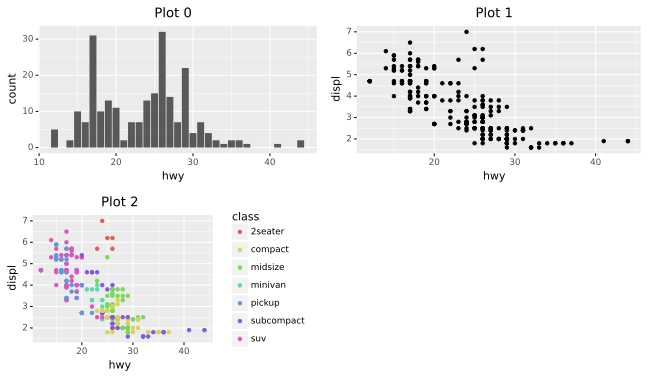

In [18]:
vis_ncol = cow.patch(g0,g1,g2) + cow.layout(ncol = 2)
vis_ncol.show(width = 12, height = 7)

##### only `ncol` with `byrow = False`

If we want the plots to be put into a by column order we can do specify such things with `byrow = False`.

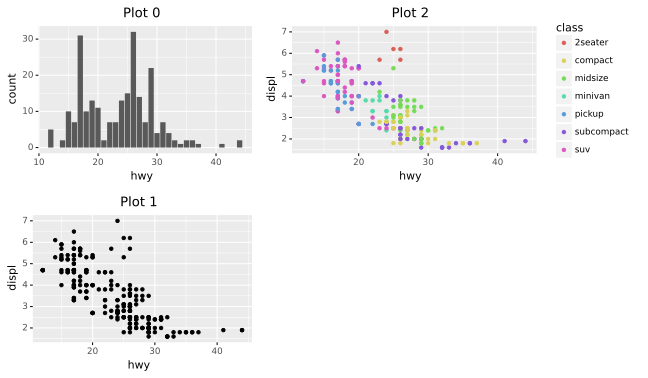

In [30]:
vis_ncol_bycol = cow.patch(g0,g1,g2) + cow.layout(ncol = 2, byrow = False, rel_widths = [2,3])
vis_ncol_bycol.show(width = 12, height = 7)

#### only nrow

Notice in the following, that since we only have 4 plots, we actually only make 2 rows (via the `byrow` approach), but we have implicit empty space as well.

/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotni

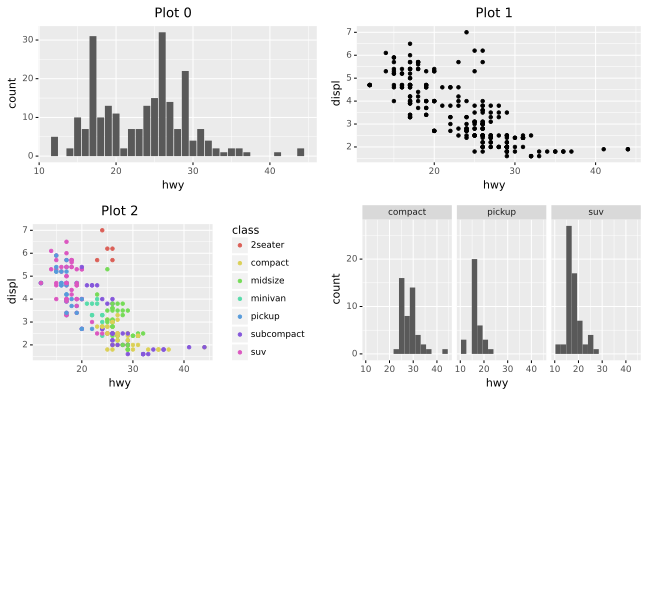

In [31]:
vis_ncol = cow.patch(g0,g1,g2,g3) + cow.layout(nrow = 3)
vis_ncol.show(width = 12, height = 11)

#### only `nrow` with `byrow=False`

/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/benjaminleroy/miniconda3/envs/python38/lib/python3.8/site-packages/plotni

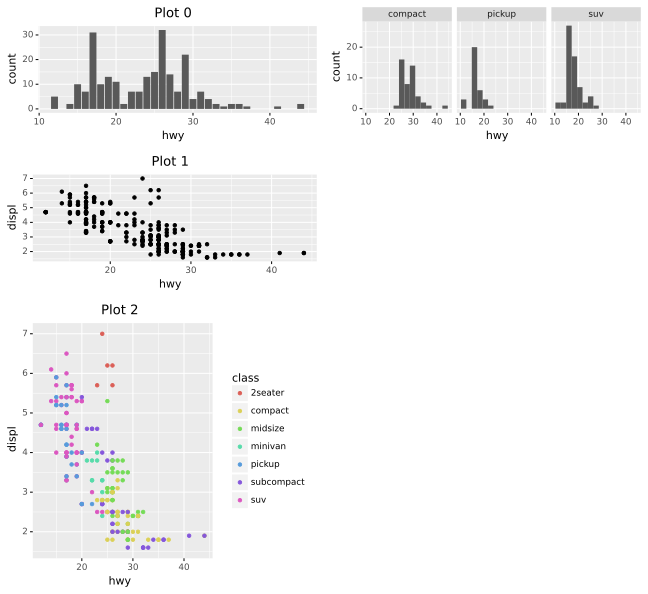

In [32]:
vis_ncol = cow.patch(g0,g1,g2,g3) + cow.layout(nrow = 3, byrow=False, rel_heights = [1,1,2])
vis_ncol.show(width = 12, height = 11)

#### Another way to describe empty space

We can see that this can implicitly express empty space with `nrow` and `ncol`s (relative to the `design` approach). We can also accomplish a similar result (though slightly different underlying objects in the following way:

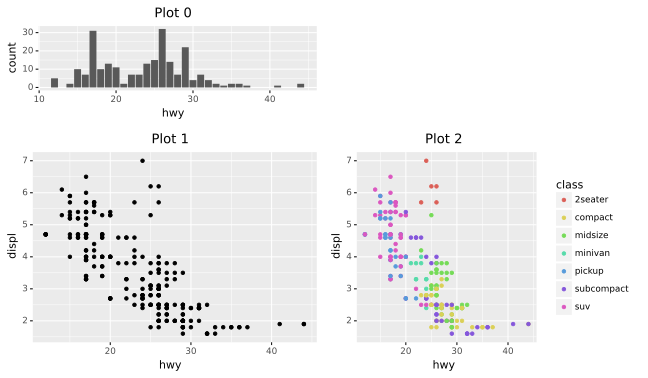

In [34]:
vis_nrow_empty = cow.patch(g0, p9.ggplot() + p9.theme_void(),
                                g1, g2) +\
    cow.layout(nrow = 2, rel_heights = [1,2])


vis_nrow_empty.show(width = 12, height = 7)

## Nesting arangement of plots

This is more similar to the functionality of `cowplot`'s `plot_grid`.

When building iteratively, you may find that you've built a segment of the final image you want (in the following example, the left column of images from the original plot layout). You can include that arangement as a single object in another larger arangement and visualized as follows.

**Note** that the specific `layout` approach didn't actually matter (could have done it also with different `design` inputs, etc.).

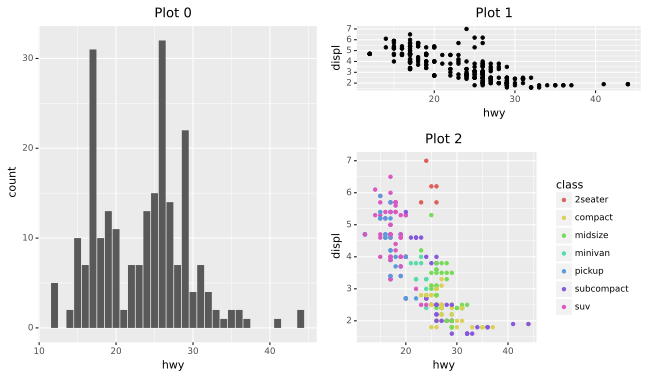

In [41]:
vis_left = cow.patch(g1,g2) + cow.layout(ncol =1, rel_heights = [1,2])

vis_total = cow.patch(g0, vis_left) + cow.layout(nrow = 1)
vis_total.show(width = 12, height = 7)

### with `grobs` parameter

This can also be done with the `grobs` parameter as introduced at the beginning of this document. For example:

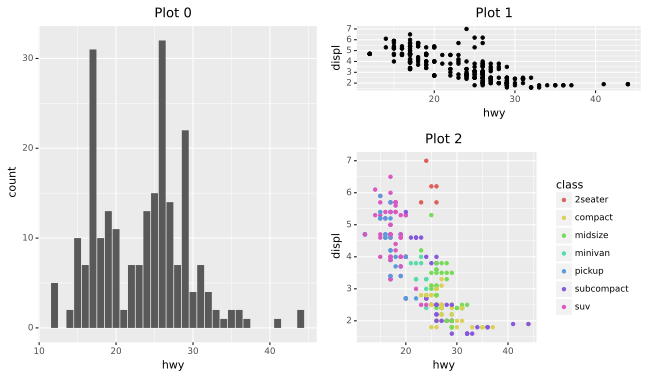

In [44]:
vis_total_g = cow.patch(grobs = [g0, vis_left]) + cow.layout(nrow = 1)
vis_total_g.show(width = 12, height = 7)